## Test \#1

**Task.**
1. Make up an arbitrary matrix $\boldsymbol{A} \in \mathbb{R}^4$.
2. Localize its spectrum $\sigma(\boldsymbol{A})$ using _Gershgorin Circle Theorem_.
3. Find its eigenvalues using _Power Method_ and its modifications: power method with offset, inverse power method etc.

### Task 1.

We will go another way around: we first define a diagonal matrix containing all eigenvalues: 
$$\boldsymbol{\Lambda} := \text{diag}(\lambda_1,\lambda_2,\lambda_3,\lambda_4)$$

And then change basis using some matrix $\boldsymbol{T}$, that is:
$$
\boldsymbol{A} = \boldsymbol{T}\boldsymbol{\Lambda}\boldsymbol{T}^{-1}
$$

Then, columns of matrix $\boldsymbol{T}$ will be eigenvectors of matrix $\boldsymbol{A}$ and eigenvalues of $\boldsymbol{A}$ would be $\lambda_1,\dots,\lambda_4$. 

In [238]:
import numpy as np

# Define eigenvalues
eigenvalues = [1.0, 2.0, 3.0, 4.0]
# Forming a diagonal matrix based on a set of selected eigenvalues
L = np.diag(eigenvalues)
# Making up some rotation matrices:
R1 = np.array([
    [np.cos(np.pi/6), -np.sin(np.pi/6), 0, 0],
    [np.sin(np.pi/6), np.cos(np.pi/6), 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])
R2 = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, np.cos(np.pi/4), -np.sin(np.pi/4)],
    [0, 0, np.sin(np.pi/4), np.cos(np.pi/4)]
])
R3 = np.array([
    [np.cos(np.pi/12), 0, -np.sin(np.pi/12), 0],
    [0, 1, 0, 0],
    [np.sin(np.pi/12), 0, np.cos(np.pi/12), 0],
    [0, 0, 0, 1]
])
R4 = np.array([
    [np.cos(np.pi/7), 0, 0, -np.sin(np.pi/7)],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [np.sin(np.pi/7), 0, 0, np.cos(np.pi/7)]
])
# Total rotation matrix:
R = R1.dot(R2).dot(R3).dot(R4)

# Finding inverse:
print(np.linalg.det(R))
R_inverse = np.linalg.inv(R)

# Finally, finding matrix A
A = R.dot(L).dot(R_inverse)
print('Matrix R is', R)
print('Matrix A is', A)

1.0
Matrix R is [[ 0.75367515 -0.5        -0.22414387 -0.36295082]
 [ 0.43513455  0.8660254  -0.12940952 -0.20954975]
 [-0.14191339  0.          0.6830127  -0.71648743]
 [ 0.47169088  0.          0.6830127   0.55767496]]
Matrix A is [[ 1.74568084 -0.14683123  0.47396289 -0.91341197]
 [-0.14683123  1.91522695  0.2736426  -0.52735865]
 [ 0.47396289  0.2736426   3.47307542 -0.2656886 ]
 [-0.91341197 -0.52735865 -0.2656886   2.86601679]]


In [220]:
# Verifying that eigenvalues and eigenvectors are indeed those we specified:
test_eigvals, test_eigvectors = np.linalg.eig(A)
print('Eigenvalues of A are\n', test_eigvals)
print('Eigenvectors of A are\n', test_eigvectors)

Eigenvalues of A are
 [1. 4. 2. 3.]
Eigenvectors of A are
 [[ 7.53675147e-01  3.62950822e-01 -5.00000000e-01 -2.24143868e-01]
 [ 4.35134549e-01  2.09549755e-01  8.66025404e-01 -1.29409523e-01]
 [-1.41913387e-01  7.16487432e-01 -1.34763471e-16  6.83012702e-01]
 [ 4.71690881e-01 -5.57674961e-01 -8.28554796e-17  6.83012702e-01]]


### Task 2.

**Theorem**. Consider circles on the complex plane:
$$
K_i = \left\{ z \in \mathbb{C}: |z-a_{i,i}| \leq \sum_{i \neq j}|a_{i,j}| \right\}, \; i = \overline{1,n}
$$

Then $\sigma(\boldsymbol{A}) \subset \bigcup_{i=1}^n K_i$

In [248]:
import matplotlib.pyplot as plt

def print_gershgorin_circles(A, ax, color='blue'):
    """
    Function that draws gershgorin circles and eigenvalues of a given matrix A
    
    Input:
    A - matrix
    ax - plt.figure
    color - (optional) color of circles
    
    Output:
    Drawn figure with circles and eigenvalues
    """
    n = len(A) # Dimensionality of A
    # Find radiuses
    radiuses = np.sum(np.abs(A),axis=1) - np.abs(np.diagonal(A))
    # Find eigenvalues to test solution
    eigenvalues = np.linalg.eigvals(A)
    for i in range(n):
        circle = plt.Circle((A[i,i], 0), radiuses[i], color=color, fill=False, linewidth=2.5)
        ax.add_patch(circle)
        ax.plot(eigenvalues[i].real, eigenvalues[i].imag, 'r+', markersize=12, mew=3)

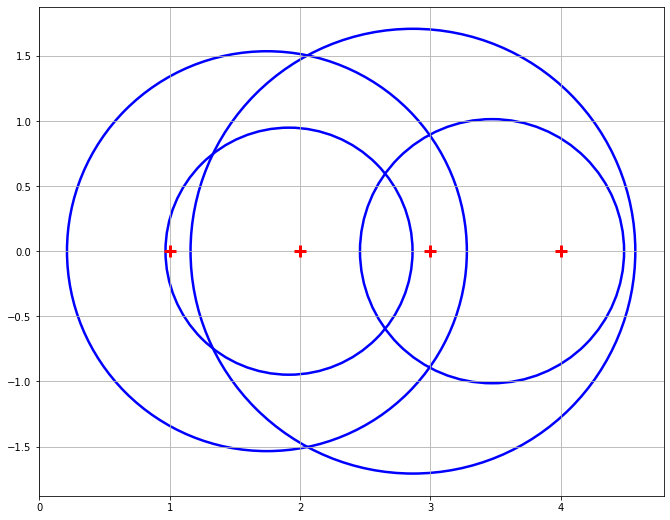

In [249]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot()
ax.set_aspect('equal')
ax.grid()

# Green circles are Gershgorin circles for a tranposed matrix, whereas blue ones for a non-tranposed one
print_gershgorin_circles(A, ax, color='blue')

### Task 3.

**Power Method**. We apply the following steps to get the largest eigenvalue:

_Step 0._ Pick random $\boldsymbol{x}^{[0]} \neq \boldsymbol{\theta}$.

_Step $k$._ Find:
$$
\boldsymbol{y}^{[k]} = \boldsymbol{A}\boldsymbol{x}^{[k-1]}, \; \boldsymbol{x}^{[k]} = \frac{\boldsymbol{y}^{[k]}}{\|\boldsymbol{y}^{[k]}\|}
$$

After sufficiently large number of steps:
$$
\lambda_1 \approx \frac{\langle \boldsymbol{y}^{[k]}, \boldsymbol{x}^{[k]} \rangle}{\langle \boldsymbol{x}^{[k]},\boldsymbol{x}^{[k]} \rangle}, \; \boldsymbol{v}_1 \approx \boldsymbol{x}^{[k]}
$$

In [223]:
def power_method(A, accuracy=10**-8):
    """
    power_method is a function that finds the largest eigenvalue of matrix A and corresponding eigenvector
    
    Input:
    A - numpy array of shape (n,n)
    
    Output:
    l, v, n - eigenvalue, eigenvector, and number of steps taken, respectively
    """
    
    n = len(A) # Matrix size
    max_steps_number = 1000
    steps = 0
    x = np.ones((n,))
    for i in range(max_steps_number):
        y = A.dot(x)
        r = np.linalg.norm(y - y.dot(x)*x)
        if r < accuracy:
            steps = i
            break
        x = y/np.linalg.norm(y)
    l = A.dot(x).dot(x)/(x.dot(x))
    return l, x, steps

eig_val, eig_vec, steps = power_method(A)
print('Largest eigenvalue is', eig_val)
print('Corresponding eigenvector is', eig_vec)
print('Number of steps taken is', steps)

Largest eigenvalue is 4.0
Corresponding eigenvector is [ 0.36295082  0.20954975  0.71648744 -0.55767496]
Number of steps taken is 66


**Power offset method**. Suppose that power method is represented via a function $p(\boldsymbol{A})$ which returns an eigenvalue based on given matrix $\boldsymbol{A}$. Then, power offset method is essentially a function:
$$
p_{\alpha}(\boldsymbol{A}) = p(\boldsymbol{A} - \alpha \boldsymbol{E}) + \alpha
$$

In [225]:
def power_offset_method(A, offset, accuracy=10**-8):
    """
    power_offset_method is a function that finds the largest 
    eigenvalue of matrix A and corresponding eigenvector using offset
    
    Input:
    A - numpy array of shape (n,n)
    offset - considered offset
    
    Output:
    l, v, n - eigenvalue, eigenvector, and number of steps taken, respectively
    """
    n = len(A)
    l, v, n = power_method(A - offset*np.identity(n), accuracy=accuracy)
    return l+offset, v, n

eig_val, eig_vec, steps = power_offset_method(A, offset=2.0)
print('Largest eigenvalue is', eig_val)
print('Corresponding eigenvector is', eig_vec)
print('Number of steps taken is', steps)

Largest eigenvalue is 4.0
Corresponding eigenvector is [ 0.36295082  0.20954976  0.71648743 -0.55767496]
Number of steps taken is 30


**Power inverse method**. Similarly, if $p(\boldsymbol{A})$ is a function that returns an eigenvalue using power method, inverse method essentially computes eigenvalue according to a function:
$$
\hat{p}_{\alpha}(\boldsymbol{A}) = \alpha + \frac{1}{p((\boldsymbol{A}-\alpha\boldsymbol{E})^{-1})}
$$

In [235]:
def power_inverse_method(A, offset, accuracy=10**-8):
    """
    power_inverse_method is a function that finds the 
    eigenvalue of matrix A and corresponding eigenvector using specified offset
    
    Input:
    A - numpy array of shape (n,n)
    offset - considered offset
    
    Output:
    l, v, n - eigenvalue, eigenvector, and number of steps taken, respectively
    """
    n = len(A)
    modified_A = np.linalg.inv(A - offset * np.identity(n))
    l, v, n = power_method(modified_A, accuracy=accuracy)
    return offset + 1/l, v, n

Largest eigenvalue is 4.0
Corresponding eigenvector is [ 0.36295082  0.20954975  0.71648743 -0.55767496]
Number of steps taken is 18


In [236]:
eig_val, eig_vec, steps = power_inverse_method(A, offset=4.5)
print('Largest eigenvalue is', eig_val)
print('Corresponding eigenvector is', eig_vec)
print('Number of steps taken is', steps)

Largest eigenvalue is 4.0
Corresponding eigenvector is [ 0.36295082  0.20954975  0.71648743 -0.55767496]
Number of steps taken is 18


### Finding the whole spectrum $\sigma(\boldsymbol{A})$

In [237]:
left_bound = 0
right_bound = 5
iterations = 30

# Finding an iteration size
iteration_size = (right_bound - left_bound) / iterations 

for i in range(30):
    eig_val, eig_vec, _ = power_inverse_method(A, offset=left_bound + iteration_size*i)
    print('Step #{}: eigenvalue {} and eigenvector {}'.format(i, eig_val, eig_vec))

Step #0: eigenvalue 1.0 and eigenvector [ 0.75367514  0.43513456 -0.14191339  0.47169088]
Step #1: eigenvalue 1.0 and eigenvector [ 0.75367514  0.43513456 -0.14191339  0.47169088]
Step #2: eigenvalue 1.0 and eigenvector [ 0.75367514  0.43513455 -0.14191339  0.47169088]
Step #3: eigenvalue 1.0 and eigenvector [ 0.75367514  0.43513455 -0.14191339  0.47169088]
Step #4: eigenvalue 1.0 and eigenvector [ 0.75367515  0.43513455 -0.14191339  0.47169088]
Step #5: eigenvalue 1.0 and eigenvector [ 0.75367515  0.43513455 -0.14191339  0.47169088]
Step #6: eigenvalue 1.0 and eigenvector [ 0.75367515  0.43513455 -0.14191339  0.47169088]
Step #7: eigenvalue 1.0 and eigenvector [ 0.75367515  0.43513455 -0.14191339  0.47169088]
Step #8: eigenvalue 1.0 and eigenvector [-0.75367515 -0.43513455  0.14191339 -0.47169088]
Step #9: eigenvalue 0.9383211664777983 and eigenvector [ 0.61553259  0.62594714 -0.13796246  0.4585588 ]
Step #10: eigenvalue 2.0 and eigenvector [-5.00000001e-01  8.66025403e-01  2.74171399

Thus we see $\sigma(\boldsymbol{A}) = \{1,2,3,4\}$. 

In [250]:
def power_rayleigh_method(A, offset, accuracy=10**-8):
    """
    power_rayleigh_method is a function that finds the 
    eigenvalue of matrix A and corresponding eigenvector using specified offset by rayleigh power method
    
    Input:
    A - numpy array of shape (n,n)
    offset - considered offset
    
    Output:
    l, n - eigenvalue and number of steps taken, respectively
    """
    max_steps_number = 1000 # Max number of steps after which we abort performing operations
    alpha = offset # Initial value of alpha
    n = len(A) # Size of a matrix
    E = np.identity(n) # nxn identity matrix
    steps = 0 # Number of steps needed to find eigenvalue
    x = np.ones((n,))
    
    for i in range(max_steps_number):
        y = np.linalg.solve(A - alpha*E, x)
        x = y/np.linalg.norm(y)
        Ax = A.dot(x)
        alpha = Ax.dot(x)
        r = np.linalg.norm(Ax - alpha*x)
        if r < accuracy:
            steps = i
            break
    return alpha, steps 

In [251]:
eig_val, steps = power_rayleigh_method(A, offset=4.5)
print('Largest eigenvalue is', eig_val)
print('Number of steps taken is', steps)

Largest eigenvalue is 4.0
Number of steps taken is 4
